# Statistikas elementi  
* Kas ir varbūtība?
* Kas ir mediāna, moda, vidējā vērtība?
* Histogramma, varbūtību sadalījums,
* Gausa un binomiālie sadalījumi,
* Dispersija, standartnovirze
<!-- * Vēl par overfittingu   -->


In [4]:
import numpy as np
import pandas as pd


from numpy.random import normal

import matplotlib.pyplot as plt

In [53]:
P,n,N,E, var, Cost, sigma, Sigma = symbols('P n N E var Cost σ Σ')

## Kas ir varbūtība?  
Varbūtība ir skaitlis intervālā no 0 līdz 1 (galapunktus ieskaitot), kas apraksta kāda notikuma iespēju notikt.  

Kāda ir varbūtība uzmest monētu ar ciparu uz augšu?  

Kāda ir varbūtība uzmest parastu metamo kauliņu uz 6?  

Ja necaurspīdīgā maisā ir 3 melnas bumbiņas un 5 baltas, kāda ir varbūtība uz labu laimi izvilkt melnu? Kāda ir varbūtība izvilkt baltu?

Ja no maisa izvelk vienu patvaļīgu bumbiņu, kā mainās varbūtība izvilkt melnu vai baltu?

**Varbūtība ir izsakāma ar divu skaitļu dalījumu - vēlamo rezultātu skaits n dalīts ar visu iespējamo rezultātu skaitu N**

In [38]:
Eq(P, n/N)

Eq(P, n/N)

Jautājums:  
Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

Jautājums:  
Kāda ir iespēja ar parastu metamo kauliņu uzmest 3 četriniekus un vienu divnieku tieši šādā secībā?
<!-- Vai secībai ir nozīme? -->

Kāda ir iespēja uzstādīt labāko iespējamo cenu kādai precei interneta veikalā?

Kāda ir iespēja, ka vidējais preces piegādes laiks ir patiesais?

Kāda ir iespēja, ka vidējais preces piegādes ir laiks ar kuru klients var rēķināties

Uz šiem visiem jautājumiem ir iespējams atbildēt, bet atbildēm ir nepieciešami dati, kas raksturo lietas kā pircēju paradumus, 
preces pašizmaksu, konkurentu uzstādītās cenas un sarakstu ar to, cik ilgu laiku ir aizņēmusi katra piegāde. Citiem vārdiem, dati.  
Apskatīsim jēdzienus, kas apraksta šādus sarakstus.  

Pirmkārt, **izlase** ir reprezentatīvs paraugs ar mērījumiem no kādas visu iespējamo mērījumu/datu kopas (sauktas arī par ģenerālkopu) par kuru mēs vēlamies iegūt patiesu un noderīgu informāciju.  

**Ģenerālkopa** iekļauj arī mērījumu kombinācijas, kurus mēs varbūt vēl neesam redzējuši.

Reprezentatīvas datu kopas definīcija variē no gadījuma uz gadījumu, bet ir pāris lietas, kurām būtu jāizpildās. 
* Izlasei jābūt pietiekoši lielai (Pēc iespējams 100% no pieejamajiem lietojamajiem datiem)
* Izlasē būtu jāizpildās tām pašām sakarībām, kurām ģenerālkopā.  

Piemēram datiem pa īpašībām būtu jābūt pareizās proporcijās. t.i. ja izlasē kāda īpašība/kolonna A pieņem vērtību 0 33% gadījumu un vērtību 1 66% gadījumu, tad šai jābūt uzvedībai, ko mēs patiesi sagaidītu no ģenerālkopas.  

Tālāk šajā notebookā runāts ir tikai par izlasēm, kuras sastāv tikai no skaitliskiem datiem.

## Mediāna, moda, vidējā vērtība?  


**Mediāna** ir kādas izlases viduspunkts.  

In [11]:
lst = [11, 20,1,24,14,19,10,9,5,4,3,7,11,11,7,15,13,14]
lst.sort()
print(lst,"\n",len(lst))
# Pāra skaita elementiem mediāna ir divu vidējo elementu summa dalīta ar 2

izlase = pd.DataFrame(lst)
izlase.median()

[1, 3, 4, 5, 7, 7, 9, 10, 11, 11, 11, 13, 14, 14, 15, 19, 20, 24] 
 18


0    11.0
dtype: float64

**Moda** ir sarakstā visbiežāk sastopamā vērtība

In [89]:
izlase.mode()

,0
0,11


**Vidējā** vērtība ir visu izlases elementu summa dalīta ar elementu skaitu. (saukta arī par mean value, expected value, arī par matemātisko cerību)  
Alternatīvi, vidējo vērtību var aprēķināt summējot visu iespējamo vērtību reizinājumus ar to šo vērtību varbūtībām. 

In [90]:
izlase.mean()

0    11.0
dtype: float64

## Histogramma, varbūtību sadalījumi    
Ja mēs sadalam izlases vērtību intervālu vienādās daļās, ar intervālu skaitu, kurš ir mazāks kā izlases vērtību skaits,  
Ja mēs katram šim intervālam piešķiram veselu skaitli, kurš atbilst tam, cik vērtības no mūsu izlases iekrīt šajos intervālos,  
Ja atliekam izlases vērtības uz X ass un vērtību skaitu katrā intervālā uz Y ass, šādu grafiku sauc par **histogrammu**.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D2E04B7730>]],
      dtype=object)

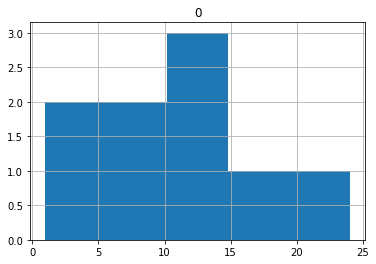

In [91]:
izlase.hist()

Histogrammas labi parāda kā mūsu izlase ir sadalījusies pa vērtībām.  

Ja visus biežumus dala ar elementu skaitu, iegūst attiecīgo intervālu varbūtības. Dalot visus izlases histogrammas stabiņu augstumus ar izlases elementu skaitu, iegūst **varbūtību sadalījumu**

In [27]:
count,divison= pd.np.histogram(izlase)
# Uzdevums:
# Transformējiet `count` saglabātos histogrammas stabiņu augstumus par varbūtību sadalījumam derīgām vērtībām.

<ipython-input-27-fd99064ea9e1>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  count,divison= pd.np.histogram(izlase)


In [9]:
# Jautājumi: 
# 1. Cik liela ir varbūtība, ka paņemot patvaļīgu skaitli no `izlase`, mēs paņemsim skaitli, kurš ir mazāks, kā 15?
# 2. Kā mēs varētu iegūt sagaidāmo (visvarbūtīgāko) vērtību no `izlase` histogrammas?

1\. $P(x<15) = \sum_{i=1}^{15} P(x=x_i)$ Jeb citiem vārdiem, saskaitam varbūtības (stabiņu augstumus) visiem skaitļiem līdz 15.  

2\. $E(x) = \sum_{i=1}^{n} P(x=x_i) \cdot x_i$ Citiem vārdiem, reizinam vērtības ar to varbūtībām (stabiņu augstumiem) un tās saskaitam.

In [ ]:
#Uzdevums: 
# Aprēķiniet
# 1. sagaidāmo vērtību
# 2. varbūtību, ka paņemot patvaļīgu skaitli no izlases, skaitlis būs lielāks par 15.

###  Gausa sadalījums  
Statistikā un dabaszinātnēs ir sastopami daudzi un dažādi sadalījumi kā Pareto sadalījums, Fermī sadalījums, Bernulli sadalījums, binomiālais sadalījums u.c. Viens no visplašāk sastopamajiem un visintuitīvākajiem ir Gausa jeb normālsadalījums.

Gausa sadalījums dabiski rodās, kad tiek mērīts kāda pazīme izlasei, kurai ir viena vidējā vērtība.  

Ja mēs ņemtu kasti ar 2cm naglām un mērītu to garumus ar precīzu instrumentu, tad mēs redzētu, ka naglu garumi sadalās pēc gausa sadalījuma ap 2cm atzīmi.

Ja mēs mērām augumus patvaļīgiem vīriešiem, mēs iegūtu aptuvenu normālsadalījumu. 

Ja mēs mērītu IQ kādai patvaļīgai izlasei no cilvēku populācijas, mēs iegūtu normālsadalījumu.

Ja mēs mērām 

In [94]:
rnd.normal()

-1.189271538739931

In [95]:
n_nums = 500
nums = []
for i in range(0,n_nums):
    nums.append(rnd.normal())

In [96]:
nums_df = pd.DataFrame(nums)

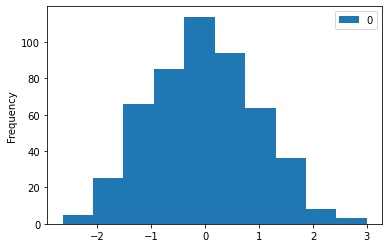

In [97]:
nums_df.plot.hist()

In [101]:
# Jautājums: 
# Vai moda(visvarbūtīgākā vērtība) vienmēr būs sagaidāmā vērtība t.i. vidējā?

In [ ]:
# Jautājums:  
# Ja mēs mērītu cik gari ir vīrieši un sievietes, vai tas, ko mēs nomērītu sekotu normālsadalījumam?

In [67]:
def distrib(m, sigm, height=100,size=200):
    res = []
    for i in range(0,size+1):
        res.append(height* np.exp( - (i - m)**2 / (2 * sigma**2) ))
    return res

(array([ 5., 32., 48., 86., 96., 68., 43., 18.,  1.,  3.]),
 array([ -5.85165687,   7.00792362,  19.86750412,  32.72708462,
         45.58666511,  58.44624561,  71.3058261 ,  84.1654066 ,
         97.0249871 , 109.88456759, 122.74414809]),
 <a list of 10 Patch objects>)

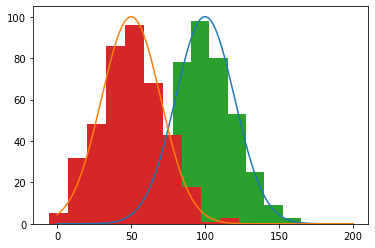

In [68]:
N=400
mu, sigma = 100, 20
mu2, sigma2 = 50, 20

X1 = np.random.normal(mu, sigma, N)
X2 = np.random.normal(mu2, sigma2, N)

distrib1 = distrib(mu,sigma)
distrib2 = distrib(mu2,sigma2)


plt.plot(distrib1)
plt.plot(distrib2)
plt.hist(X1)
plt.hist(X2)

## Binomiālais sadalījums  


## Dispersija, standartnovirze

**Dispersija (angliski variance)** raksturo cik tālu punkti ir izvietojušies no sadalījuma vidējās vērtības.
Dispersija ir summa, kurā summē visu izlases elementu vērtību nobīdes no vidējā pakāpinātas kvadrātā t.i ja mums ir dota tabula

In [17]:
izl = pd.DataFrame([1,2,2,4,7,9])
izl_list = list(izl[0])
izl

,0
0,1
1,2
2,2
3,4
4,7
5,9


kur izlases vidējā vērtība ir

In [18]:
videja = izl.mean()
videja

0    4.166667
dtype: float64

In [20]:
# sum(izl_list)/len(izl_list)

4.166666666666667

tad dispersiju var aprēķināt sekojoši:

In [10]:
dispersija = 0
for elem in izl_list:
    dispersija = dispersija + (elem - videja)**2
dispersija = dispersija / len(izl_list)
dispersija

0    17.361111
dtype: float64

**Standartnovirze** ir kvadrātsakne no dispersijas, raksturo to, cik labi dati aproksimē vidējo vērtību

In [30]:
stdev = np.sqrt(dispersija)
print(stdev)

0    4.166667
dtype: float64


In [121]:
izl.describe() # DataFrame.describe() metodi var izmantot, lai aprēķinātu šīs statistikas.
# Te gan std nesakrīt ar to, ko mēs izrēķinājām ar roku. 
# pd.DataFrame.std() funkcija izmanto kaut kādu normēšanas sistēmu, kurus es nesaprotu līdz galam.

,0
count,6.000000
mean,4.166667
std,3.188521
min,1.000000
25%,2.000000
50%,3.000000
75%,6.250000
max,9.000000
